In [5]:
#IMPORTANTE: Los datos descargados de la pagina de ACE tienen en la columna H_density_#/cc con lo cual a la hora de leer los archivos no se lee too el resto de las colummnas
#Tuve que manualmente borrar el # para que funcione bien el codigo ya que hacer otras cosas como skippear filas no es práctico.
folder_path_test = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/SWE/AC_H0_SWE_2017.csv'
import pandas as pd
import numpy as np
file_path_mag = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/MFI/AC_H0_MFI_1999.csv'
df_mag = pd.read_csv(file_path_mag, comment="#")
df_mag['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df_mag['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
df_mag.set_index('EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', inplace=True)
df_mag[(df_mag['BX_GSE_(@_x_component_)_nT'] < -9999) & (df_mag['BY_GSE_(@_y_component_)_nT'] < -9999) & (df_mag['BZ_GSE_(@_z_component_)_nT'] < -9999) & (df_mag['<|B|>__nT'] < -9999)] = np.nan
resampled_data_mag = df_mag.resample('64S').mean()
resampled_data_mag.reset_index(inplace=True)

file_path_swe = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/SWE/AC_H0_SWE_1999.csv'
df_swe = pd.read_csv(file_path_swe, comment="#")
df_swe['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df_swe['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])
df_swe.set_index('EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', inplace=True)
df_swe[(df_swe['H_DENSITY_/cc'] < -9999) & (df_swe['SW_H_SPEED_km/s'] < -9999) & (df_swe['VX_(GSE)_km/s'] < -9999) & (df_swe['VY_(GSE)_km/s'] < -9999) & (df_swe['VZ_(GSE)_km/s'] < -9999)] = np.nan
resampled_data_swe = df_swe.resample('64S').mean()
resampled_data_swe.reset_index(inplace=True)

merged_data = resampled_data_swe.merge(resampled_data_mag, left_index=True, right_index=True)
merged_data = merged_data.drop('EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', axis=1)
merged_data = merged_data.dropna()
merged_data.to_csv('/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/Filtered data/1999_.csv', index=True)




En este código se debe manualmente ir $\underline{modificando}$ el año en 3 lugares y hace un filtrado de los datos y los combina en un csv que contiene la información de los dos instrumentos juntos. Se me borró el codigo lo volví a escribir asi que puede llegar a tener errores, no creo sea el caso. En el caso que se quieran agregar más datos de otro año no es necesario correr todo de vuelta, se puede hacer el archivo para ese/esos año/s y luego concatenarlo con el segundo bloque. La sugerencia es pasarlo a una nueva carpeta auxiliar hacerlo ahi y despues manualmente moverlo a la carpeta filtered data que es la que contiene los datos por año juntos y todos los datos combianados. 

A su vez, hay una gran cantidad de datos faltantes en especial en el aparator SWE, y en particular en la densidad de protones. Eso es algo propio del instrumento. Hay que ver porque sucede esto y sería importante entender como mide. Por otro lado como algo anecdotico, perdí el código por no guardar mientras estaba arreglando un error que me tardó dar cuenta debido a que los datos del 2004 los cargue como los del 2005 y tenía duplicados. Los tuve que sacar a los duplicados con una función build in de pandas :(

In [ ]:
import os
folder_path = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/Filtered data/'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
combined_data = pd.DataFrame()

for filename in csv_files:
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path, comment="#")
    combined_data = pd.concat([combined_data, df])
combined_data.reset_index(drop=True, inplace=True)
combined_data.sort_values(by='EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', inplace=True)
combined_data.reset_index(drop=True, inplace=True)
combined_data.to_csv('combined_data.csv', index=False)

In [6]:
import os
folder_path = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/aux/'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
combined_data = pd.DataFrame()

for filename in csv_files:
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path, comment="#")
    combined_data = pd.concat([combined_data, df])
combined_data.reset_index(drop=True, inplace=True)
combined_data.sort_values(by='EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', inplace=True)
combined_data.reset_index(drop=True, inplace=True)
combined_data.to_csv('/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/aux/combined_data.csv', index=False)

------------------------
Hasta Aquí es lo único que se necesita. El resto es código auxiliar
------------------------------------
------------------------------------

In [ ]:
import pandas as pd
import os
#Ubicamos a los archivos csv
folder_path = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/MFI/'
# Listado de todos los csv
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
for file_name in csv_files:

    file_path_mag = os.path.join(folder_path, file_name)
    # Se saltea las filas comentadas con # a su vez que se aclara que la coordenada temporal en una corordenada de fecha
    df = pd.read_csv(file_path_mag, comment='#')
    df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
    df.set_index('EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', inplace=True)
    #Filtrado de los datos y resampleado considerando el promedio y armado de intervalos de 64 segundos
    df = df[(df['BX_GSE_(@_x_component_)_nT'] > -9999) & (df['BY_GSE_(@_y_component_)_nT'] > -9999) & (df['BZ_GSE_(@_z_component_)_nT'] > -9999) & (df['<|B|>__nT'] > -9999)]
    resampled_data = df.resample('64S').mean()
    
    output_file_name = os.path.splitext(file_name)[0] + '_64.csv'
    output_file_path = os.path.join(folder_path, output_file_name)
    resampled_data.to_csv(output_file_path, index=True)

In [4]:
#Me interesa hacer un archivo que contenga los datos de magnetismo todos unidos y que poseean los tiempos correspondientes
combined_data = pd.DataFrame()
csv_files = [file for file in os.listdir(folder_path) if file.endswith('64.csv')]
for filename in csv_files:
    file_path = os.path.join(folder_path, filename)
    
    # Tener cuidado si los archivos tienen comentarios. En este caso los archivos 64.csv no lo tiene
    df = pd.read_csv(file_path)
    df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
    #Con esto concatenamos
    combined_data = pd.concat([combined_data, df])

combined_data.sort_values(by='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', inplace=True)

# Se resetean el indíce asi tenemos un archivo csv en crudo con índices del 0 a N
combined_data.reset_index(drop=True, inplace=True)
combined_data.to_csv('mag_combined.csv', index=False)



In [33]:
#Vamos a aprovechar y hacer el rejunte de datos para los datos de SWE, para ello primero vamos a guardar los datos del SWE filtrados y luego concatenarlos, esta primera celda hace dicho filtro, la siguiente los concatena
#Hago una prueba para solo un archivo
#IMPORTANTE: Los datos descargados de la pagina de ACE tienen en la columna H_density_#/cc con lo cual a la hora de leer los archivos no se lee too el resto de las colummnas
#Tuve que manualmente borrar el # para que funcione bien el codigo ya que hacer otras cosas como skippear filas no es práctico.
folder_path_test = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/SWE/AC_H0_SWE_2017.csv'
df = pd.read_csv(folder_path_test,comment = "#")
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])
df = df[(df['H_DENSITY_/cc'] > -9999) & (df['SW_H_SPEED_km/s'] > -9999) & (df['VX_(GSE)_km/s'] > -9999) & (df['VY_(GSE)_km/s'] > -9999) & (df['VZ_(GSE)_km/s'] > -9999) ]


In [3]:
#Vamos a aprovechar y hacer el rejunte de datos para los datos de SWE, para ello primero vamos a guardar los datos del SWE filtrados y luego concatenarlos, esta primera celda hace dicho filtro, la siguiente los concatena
import pandas as pd
import os
#Ubicamos a los archivos csv
folder_path = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/SWE/'
# Listado de todos los csv
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
for file_name in csv_files:

    file_path= os.path.join(folder_path, file_name)
    # Se saltea las filas comentadas con # a su vez que se aclara que la coordenada temporal en una corordenada de fecha
    df = pd.read_csv(file_path, comment = "#")
    df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])
    df.set_index('EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', inplace=True)
    #Filtrado de los datos y resampleado considerando el promedio y armado de intervalos de 64 segundos
    df = df[(df['H_DENSITY_/cc'] > -9999) & (df['SW_H_SPEED_km/s'] > -9999) & (df['VX_(GSE)_km/s'] > -9999) & (df['VY_(GSE)_km/s'] > -9999) & (df['VZ_(GSE)_km/s'] > -9999) ]

    output_file_name = os.path.splitext(file_name)[0] + '_.csv'
    output_file_path = os.path.join(folder_path, output_file_name)
    df.to_csv(output_file_path, index=True)


In [4]:
import os
import pandas as pd

folder_path = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/SWE/'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('_.csv')]
combined_data = pd.DataFrame()

for filename in csv_files:
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path, comment="#")
    combined_data = pd.concat([combined_data, df])
combined_data.reset_index(drop=True, inplace=True)
combined_data.sort_values(by='EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', inplace=True)
combined_data.reset_index(drop=True, inplace=True)
combined_data.to_csv('SWE_combined.csv', index=False)


In [ ]:
#Este código sirve para hacer un archivo individual y guardarlo en la carpeta de datos filtrados, en donde se combina swe con mfi.
import pandas as pd
file_path_mag = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/MFI/AC_H0_MFI_1998.csv'
df = pd.read_csv(file_path_mag,comment="#")
df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
df.set_index('EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', inplace = True)
df = df[(df['BX_GSE_(@_x_component_)_nT'] > -9999) & (df['BY_GSE_(@_y_component_)_nT'] > -9999) & (df['BZ_GSE_(@_z_component_)_nT'] > -9999) & (df['<|B|>__nT'] > -9999)]
resampled_data = df.resample('64S').mean()
resampled_data.to_csv('/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/MFI'+'AC_H0_MFI_1998_64.csv', index=True)

In [1]:
import pandas as pd
file_path_mag = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/MFI/AC_H0_MFI_1999.csv'
file_path_swe = '/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/SWE/AC_H0_SWE_1999.csv'
df_swe= pd.read_csv(file_path_mag, comment = "#")
df_mag = pd.read_csv(file_path_swe,comment = "#")


Me fijo que los datos resampleados son los mismos que los datos sin samplear pero suavizado. Se puede ver en l asiguiente figura que está grabada en las figuras descargadas.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/MFI/AC_H0_MFI_1999.csv',comment="#")
df_64 = pd.read_csv('/Users/nicoseltzer/Downloads/Tesis/ACESWEPAM/Filtered data/1999.csv')

In [18]:
	
plt.style.use('fast')

In [15]:
df = df[(df['BX_GSE_(@_x_component_)_nT'] > -9999) & (df['BY_GSE_(@_y_component_)_nT'] > -9999) & (df['BZ_GSE_(@_z_component_)_nT'] > -9999) & (df['<|B|>__nT'] > -9999)]
B = df[df.columns[1]]
t = pd.to_datetime(df[df.columns[0]])
B_64 = df_64[df_64.columns[7]]
t_64 = pd.to_datetime(df_64[df_64.columns[1]])

<function matplotlib.pyplot.show(close=None, block=None)>

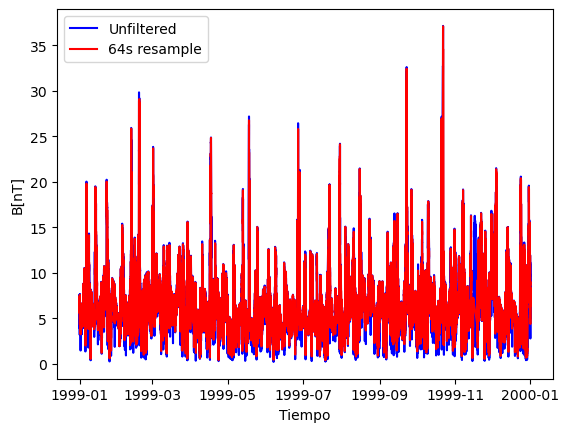

In [25]:
plt.figure()
plt.plot(t,B,color = "blue",label= "Unfiltered")
plt.plot(t_64,B_64,color = "red",label = "64s resample")
plt.xlabel("Tiempo")
plt.ylabel("B[nT]")
plt.legend()
plt.show

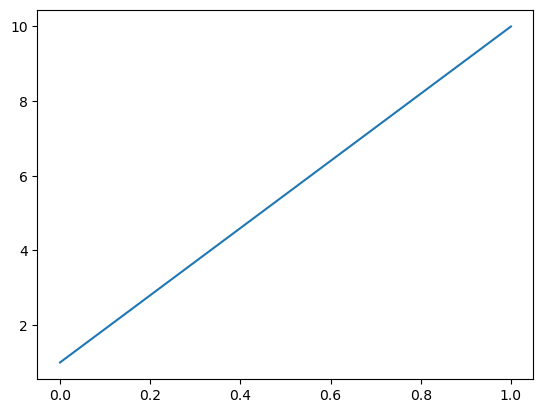

In [24]:
plt.style.use('default')
plt.plot(np.linspace(0,1,10),np.linspace(1,10,10))